# Sample Notebook

## Setup

### Imports
Put the import statements at the top so it is easy for your readers to know what they must install to use your notebook.

In [4]:
import pandas as pd
import plotnine as gg

In [5]:
from tqdm.notebook import tqdm

### Configurations

For instance, how to show cell output. 

In [6]:
# Example with default 'last'
sum(range(10)) #no

print(sum(range(10))) #yes

sum(range(100)) #yes

45


4950

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

#Options: 'all', 'last', 'last_expr', 'none', 'last_expr_or_assign'

In [8]:
# Example v2 with 'all'
sum(range(10))        #yes
print(sum(range(10))) #yes
sum(range(100))       #yes

45

45


4950

## Working with data

### Loading Data

In [9]:
df = pd.read_csv("data/registration_times.csv")

In [10]:
df.head()
df.dtypes  #not the types we want!

,Registration Time,org
0,2022-10-19 13:43:15,cu
1,2022-10-19 18:53:05,cu
2,2022-10-27 09:56:39,cu
3,2022-10-25 13:45:37,cu
4,2022-10-20 09:37:27,cu


Registration Time    object
org                  object
dtype: object

### Aside: Editor Features

In [11]:
#demonstrate completion
pd.to_   #(tab)

AttributeError: module 'pandas' has no attribute 'to_'

In [12]:
#demonstate help
pd.to_datetime #(shift-tab)

<function pandas.core.tools.datetimes.to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool' = False, format: 'str | None' = None, exact: 'bool | lib.NoDefault' = <no_default>, unit: 'str | None' = None, infer_datetime_format: 'lib.NoDefault | bool' = <no_default>, origin: 'str' = 'unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'>

In [13]:
#contextual help in Help > Show Contextual Help

### Prep Data

In [14]:
df['Registration_Time'] = pd.to_datetime(df['Registration Time'], utc=False)
df['org'] = pd.Categorical(df.org, categories=['wcm', 'cu', 'other'])
df.dtypes

Registration Time            object
org                        category
Registration_Time    datetime64[ns]
dtype: object

In [80]:
df['Registration_Time']

0     2022-10-19 13:43:15
1     2022-10-19 18:53:05
2     2022-10-27 09:56:39
3     2022-10-25 13:45:37
4     2022-10-20 09:37:27
              ...        
261   2022-10-27 14:50:53
262   2022-10-19 13:42:07
263   2022-11-01 10:27:14
264   2022-10-19 15:33:51
265   2022-10-25 10:31:17
Name: Registration_Time, Length: 266, dtype: datetime64[ns]

In [92]:
df.head(100)

,Registration Time,org,Registration_Time
0,2022-10-19 13:43:15,cu,2022-10-19 13:43:15
1,2022-10-19 18:53:05,cu,2022-10-19 18:53:05
2,2022-10-27 09:56:39,cu,2022-10-27 09:56:39
3,2022-10-25 13:45:37,cu,2022-10-25 13:45:37
4,2022-10-20 09:37:27,cu,2022-10-20 09:37:27
...,...,...,...
95,2022-11-05 22:39:20,cu,2022-11-05 22:39:20
96,2022-10-19 15:32:53,cu,2022-10-19 15:32:53
97,2022-10-21 11:22:30,cu,2022-10-21 11:22:30
98,2022-10-19 15:10:26,cu,2022-10-19 15:10:26


In [17]:
df.describe(include='all')

,Registration Time,org,Registration_Time
count,266,266,266
unique,266,3,NaN
top,2022-10-19 13:43:15,wcm,NaN
freq,1,136,NaN
mean,NaN,NaN,2022-10-23 23:35:12.714285568
min,NaN,NaN,2022-10-18 13:04:49
25%,NaN,NaN,2022-10-19 13:28:39.750000128
50%,NaN,NaN,2022-10-20 11:08:16.500000
75%,NaN,NaN,2022-10-27 14:41:17.500000
max,NaN,NaN,2022-11-07 14:48:17


### Plot data

In [131]:
start_t =  pd.to_datetime('2022-10-18 13:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 13:00:00', utc=False)

start_t =  pd.to_datetime('2022-10-19 1:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-20 01:00:00', utc=False)

#pandas to manipulate data
plot_df = (
    df
    .sort_values("Registration_Time")
    .query("(Registration_Time >= @start_t) & (Registration_Time <= @stop_t)")
)

In [132]:
df.dtypes
plot_df.dtypes

Registration Time            object
org                        category
Registration_Time    datetime64[ns]
dtype: object

Registration Time            object
org                        category
Registration_Time    datetime64[ns]
dtype: object

In [148]:
start_t =  pd.to_datetime('2022-10-19 04:00:00', utc=False)
stop_t = pd.to_datetime('2022-10-19 23:00:00', utc=False)

#pandas to manipulate data
plot_df = (
    df
    .sort_values("Registration_Time")
    .query("(Registration_Time >= @start_t) & (Registration_Time <= @stop_t)")
).iloc[::2]


# plotnine to plot (using grammar of graphics like ggplot2)
plot = (
    gg.ggplot(plot_df, gg.aes(x='Registration_Time', fill='org'))
    + gg.geom_histogram(binwidth=4/24, position='stack', color='black', show_legend=False)
    + gg.facet_wrap('org')
    + gg.theme_bw()
    + gg.theme(figure_size=(9,6))
    + gg.theme(axis_text_x=gg.element_text(angle=30, hjust=1))
    + gg.xlab("Time")
    + gg.ylab("Registrations") 
    + gg.ggtitle("Registrations for R workshop in first 48 hours")
)
plot.show()

TypeError: can't compare offset-naive and offset-aware datetimes

In [149]:
## Show save, download, export

In [150]:
sum(plot_df['Registration_Time'].apply(lambda x: x.utcoffset() is not None))
plot_df.head(80)

0

,Registration Time,org,Registration_Time
126,2022-10-19 04:42:04,other,2022-10-19 04:42:04
136,2022-10-19 08:44:47,wcm,2022-10-19 08:44:47
185,2022-10-19 09:02:58,wcm,2022-10-19 09:02:58
133,2022-10-19 09:51:56,wcm,2022-10-19 09:51:56
260,2022-10-19 10:07:11,wcm,2022-10-19 10:07:11
202,2022-10-19 10:16:29,wcm,2022-10-19 10:16:29
90,2022-10-19 10:56:23,cu,2022-10-19 10:56:23
231,2022-10-19 11:11:36,wcm,2022-10-19 11:11:36
197,2022-10-19 11:31:27,wcm,2022-10-19 11:31:27
92,2022-10-19 12:16:54,cu,2022-10-19 12:16:54


In [49]:
start_t =  pd.to_datetime('2022-10-18 13:00:00', utc=False)
stop_t = df['Registration_Time'].max() #pd.to_datetime('2022-10-20 13:00:00', utc=False)
start_t
stop_t


Timestamp('2022-10-18 13:00:00')

Timestamp('2022-11-07 14:48:17')

In [50]:
import dateutil
import datetime
import mizani

In [51]:
dateutil.relativedelta.relativedelta(start_t, stop_t)

relativedelta(days=-20, hours=-1, minutes=-48, seconds=-17)

In [52]:
foo = datetime.datetime.fromisoformat(start_t.isoformat())
foo.utcoffset()
start_t

Timestamp('2022-10-18 13:00:00')

In [53]:
foo = mizani._core.date_utils.Interval(start_t, stop_t)
foo
foo.limits_minute()

Interval(start=datetime.datetime(2022, 10, 18, 13, 0), end=datetime.datetime(2022, 11, 7, 14, 48, 17))

(datetime.datetime(2022, 10, 18, 13, 0),
 datetime.datetime(2022, 11, 7, 14, 49))

In [55]:
from plotnine.data import meat

In [61]:
meat_long = meat.melt(
    id_vars="date",
    value_vars=["beef", "veal", "pork", "lamb_and_mutton", "broilers", "turkey"],
    var_name="animal",
    value_name="weight"
).dropna()

meat_long_monthly_agg = meat_long.groupby("date").agg({"weight": "sum"}).reset_index()
meat_long_monthly_agg.head()
meat_long_monthly_agg['date'] = pd.to_datetime(meat_long_monthly_agg['date'])

,date,weight
0,1944-01-01,2205.0
1,1944-02-01,2031.0
2,1944-03-01,2034.0
3,1944-04-01,1783.0
4,1944-05-01,1894.0


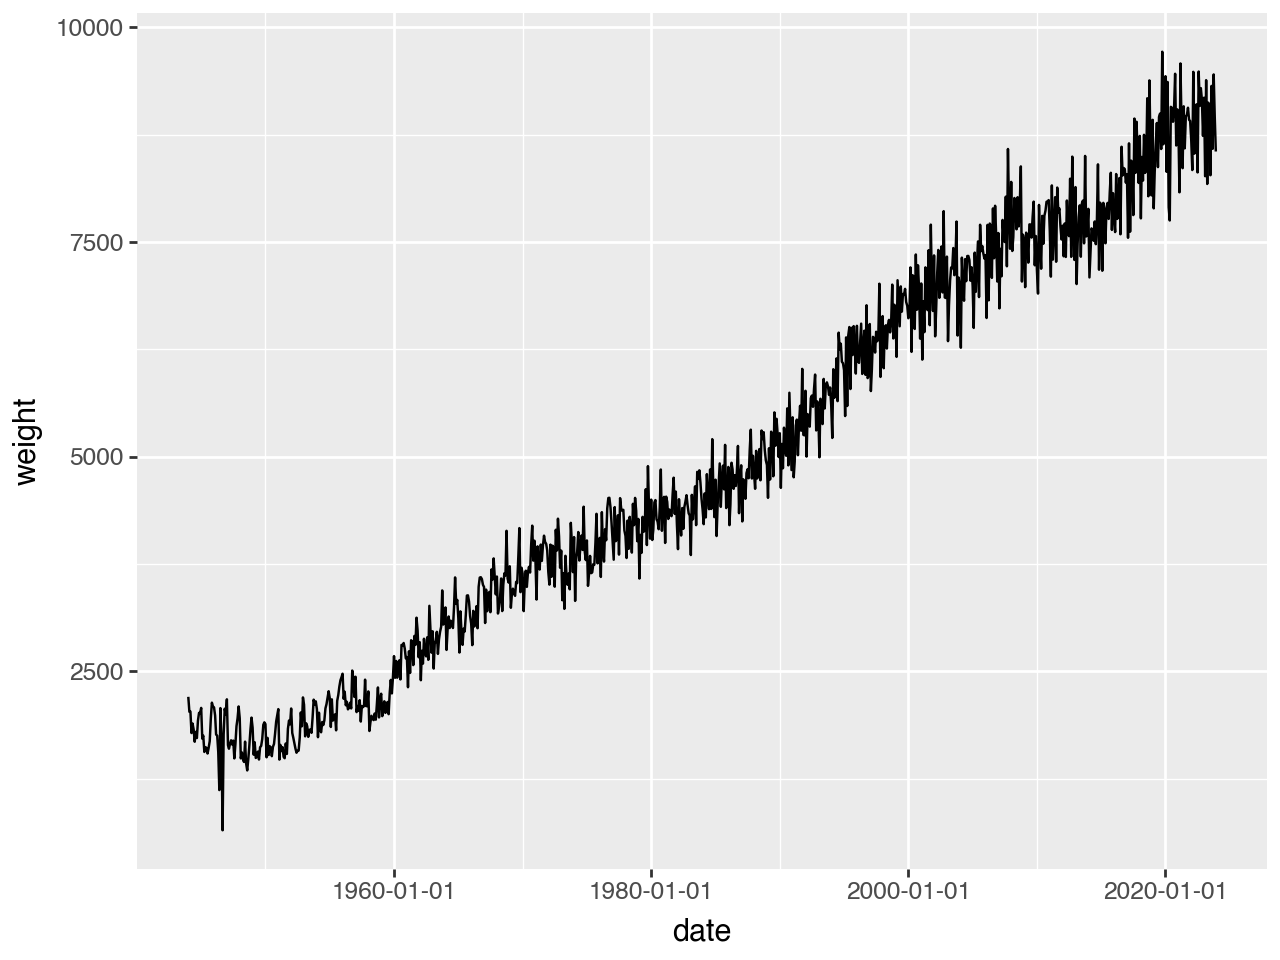

In [63]:
m_start_t =  pd.to_datetime('1950-10-18 13:00:00', utc=False)
m_stop_t = pd.to_datetime('1960-10-20 13:00:00', utc=False)

plot_df = (
    meat_long_monthly_agg
    .query("(date >= @m_start_t) & (date <= @m_stop_t)")
)

(
    gg.ggplot(meat_long_monthly_agg, gg.aes(x="date", y="weight"))
    + gg.geom_line()
)